# Deep Neural Network for MNIST Classification

We'll apply all the knowledge from the lectures in this section to write a deep neural network. The problem we've chosen is referred to as the "Hello World" of deep learning because for most students it is the first deep learning algorithm they see.

The dataset is called MNIST and refers to handwritten digit recognition. You can find more about it on Yann LeCun's website (Director of AI Research, Facebook). He is one of the pioneers of what we've been talking about and of more complex approaches that are widely used today, such as covolutional neural networks (CNNs).

The dataset provides 70,000 images (28x28 pixels) of handwritten digits (1 digit per image).

The goal is to write an algorithm that detects which digit is written. Since there are only 10 digits (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), this is a classification problem with 10 classes.

Our goal would be to build a neural network with 2 hidden layers.

In [1]:
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

In [3]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)

mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [7]:
num_validation_samples=0.1 * mnist_info.splits['train'].num_examples
num_validation_samples=tf.cast(num_validation_samples,tf.int64)

num_test_samples= mnist_info.splits['test'].num_examples
num_test_samples=tf.cast(num_test_samples,tf.int64)

def scale(image,label):
  image=tf.cast(image,tf.float32)
  image /=255.
  return image,label

scaled_train_and_validation_data=mnist_train.map(scale)
test_data=mnist_test.map(scale)

BUFFER_SIZE=10000
shuffled_train_and_validation_data=scaled_train_and_validation_data.shuffle(BUFFER_SIZE)
validation_data=shuffled_train_and_validation_data.take(num_validation_samples)
train_data=shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE=100
train_data=train_data.batch(BATCH_SIZE)
validation_data=validation_data.batch(num_validation_samples)
test_data=test_data.batch(num_test_samples)

validation_inputs,validation_targets=next(iter(validation_data))


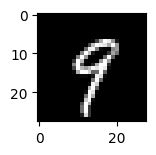

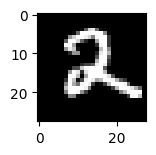

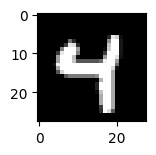

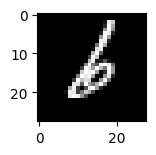

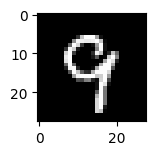

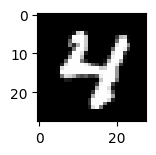

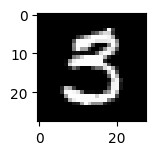

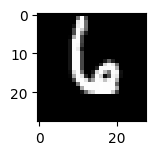

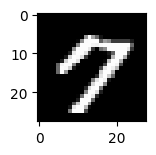

In [9]:
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(validation_inputs[i],cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [12]:
input_size=784
output_size=10
hidden_layer_size=50

model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
NUM_EPOCHS=5
model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs,validation_targets))

Epoch 1/5
540/540 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7968 - loss: 0.7111 - val_accuracy: 0.9407 - val_loss: 0.2083
Epoch 2/5
540/540 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9406 - loss: 0.2014 - val_accuracy: 0.9538 - val_loss: 0.1551
Epoch 3/5
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9566 - loss: 0.1503 - val_accuracy: 0.9645 - val_loss: 0.1191
Epoch 4/5
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9638 - loss: 0.1199 - val_accuracy: 0.9678 - val_loss: 0.1076
Epoch 5/5
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9702 - loss: 0.0988 - val_accuracy: 0.9702 - val_loss: 0.0950


In [17]:
test_loss,test_accuracy=model.evaluate(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.9653 - loss: 0.1146


In [21]:
print("Test loss:{0:.2f}. Test Accuracy: {1:.2f}.".format(test_loss,test_accuracy*100.))

Test loss:0.11. Test Accuracy: 96.53.
